In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
#Importing Necessary Libraries
import warnings
warnings.filterwarnings('ignore')

In [146]:
#Importing Necessary Libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,f_classif

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve,auc

In [5]:
#Converting Excel file to csv file
read_file = pd.read_excel ("drybean.xlsx")
read_file.to_csv ("drybean.csv")

In [6]:
#Reading csv file
data=pd.read_csv('drybean.csv')

In [7]:
#Creating dataframe
df=pd.DataFrame(data)

In [8]:
df

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [9]:
df.head(10)

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [10]:
df.tail(10)

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13601,13601,42042,771.515,288.082674,186.347090,1.545947,0.762615,42476,231.364511,0.816254,0.989782,0.887574,0.803118,0.006852,0.001758,0.644999,0.997134,DERMASON
13602,13602,42047,768.936,292.975007,183.139141,1.599740,0.780543,42446,231.378269,0.773890,0.990600,0.893644,0.789754,0.006968,0.001672,0.623712,0.997777,DERMASON
13603,13603,42049,770.185,290.163403,185.051685,1.568013,0.770243,42503,231.383771,0.756005,0.989318,0.890790,0.797426,0.006901,0.001721,0.635888,0.997080,DERMASON
13604,13604,42070,763.489,289.022373,186.123434,1.552853,0.765046,42556,231.441543,0.768823,0.988580,0.906936,0.800774,0.006870,0.001743,0.641239,0.995750,DERMASON
13605,13605,42070,760.701,276.691651,193.945366,1.426647,0.713216,42458,231.441543,0.730813,0.990862,0.913596,0.836460,0.006577,0.001986,0.699666,0.998176,DERMASON
13606,13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       13611 non-null  int64  
 1   Area             13611 non-null  int64  
 2   Perimeter        13611 non-null  float64
 3   MajorAxisLength  13611 non-null  float64
 4   MinorAxisLength  13611 non-null  float64
 5   AspectRation     13611 non-null  float64
 6   Eccentricity     13611 non-null  float64
 7   ConvexArea       13611 non-null  int64  
 8   EquivDiameter    13611 non-null  float64
 9   Extent           13611 non-null  float64
 10  Solidity         13611 non-null  float64
 11  roundness        13611 non-null  float64
 12  Compactness      13611 non-null  float64
 13  ShapeFactor1     13611 non-null  float64
 14  ShapeFactor2     13611 non-null  float64
 15  ShapeFactor3     13611 non-null  float64
 16  ShapeFactor4     13611 non-null  float64
 17  Class       

In [12]:
df.columns


Index(['Unnamed: 0', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [13]:
print ('This data test  has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

This data test  has 13611 rows and 18 columns


In [14]:
df.describe()

,Unnamed: 0,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,6805.000000,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,3929.301592,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,0.000000,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3402.500000,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,6805.000000,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,10207.500000,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,13610.000000,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [15]:
#Checking for null values
df.isnull().sum()

Unnamed: 0         0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [16]:
#Checking for duplicates values
dup_count=df.duplicated().sum()
print(f"Number of Duplicate Rows:{dup_count}")

Number of Duplicate Rows:0


In [17]:
df=df.drop('Unnamed: 0',axis=1)

In [18]:
df.head(1)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER


In [19]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [20]:
categorical_cols=['class']
categorical_cols

['class']

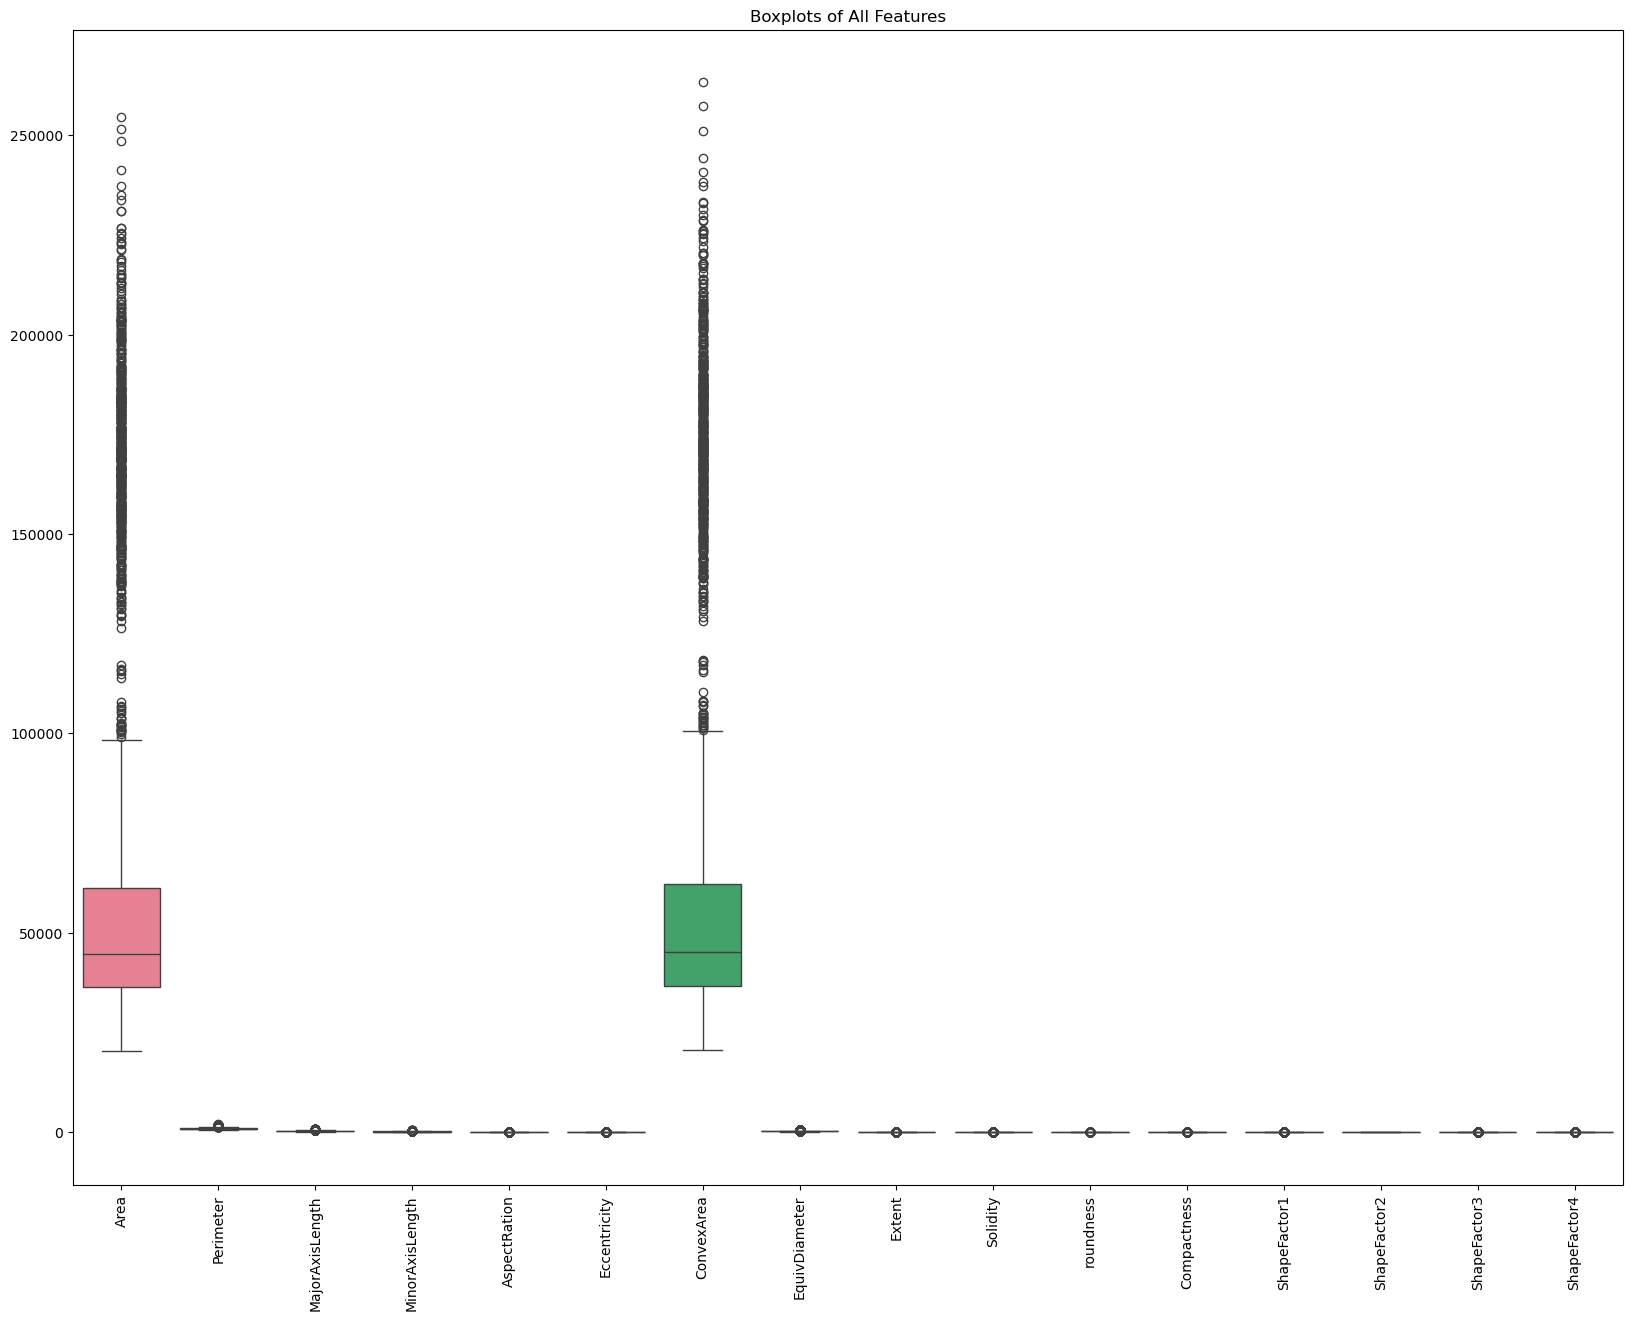

In [21]:
# Plot boxplots for all features)
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.title("Boxplots of All Features")
plt.xticks(rotation=90) 
plt.show()


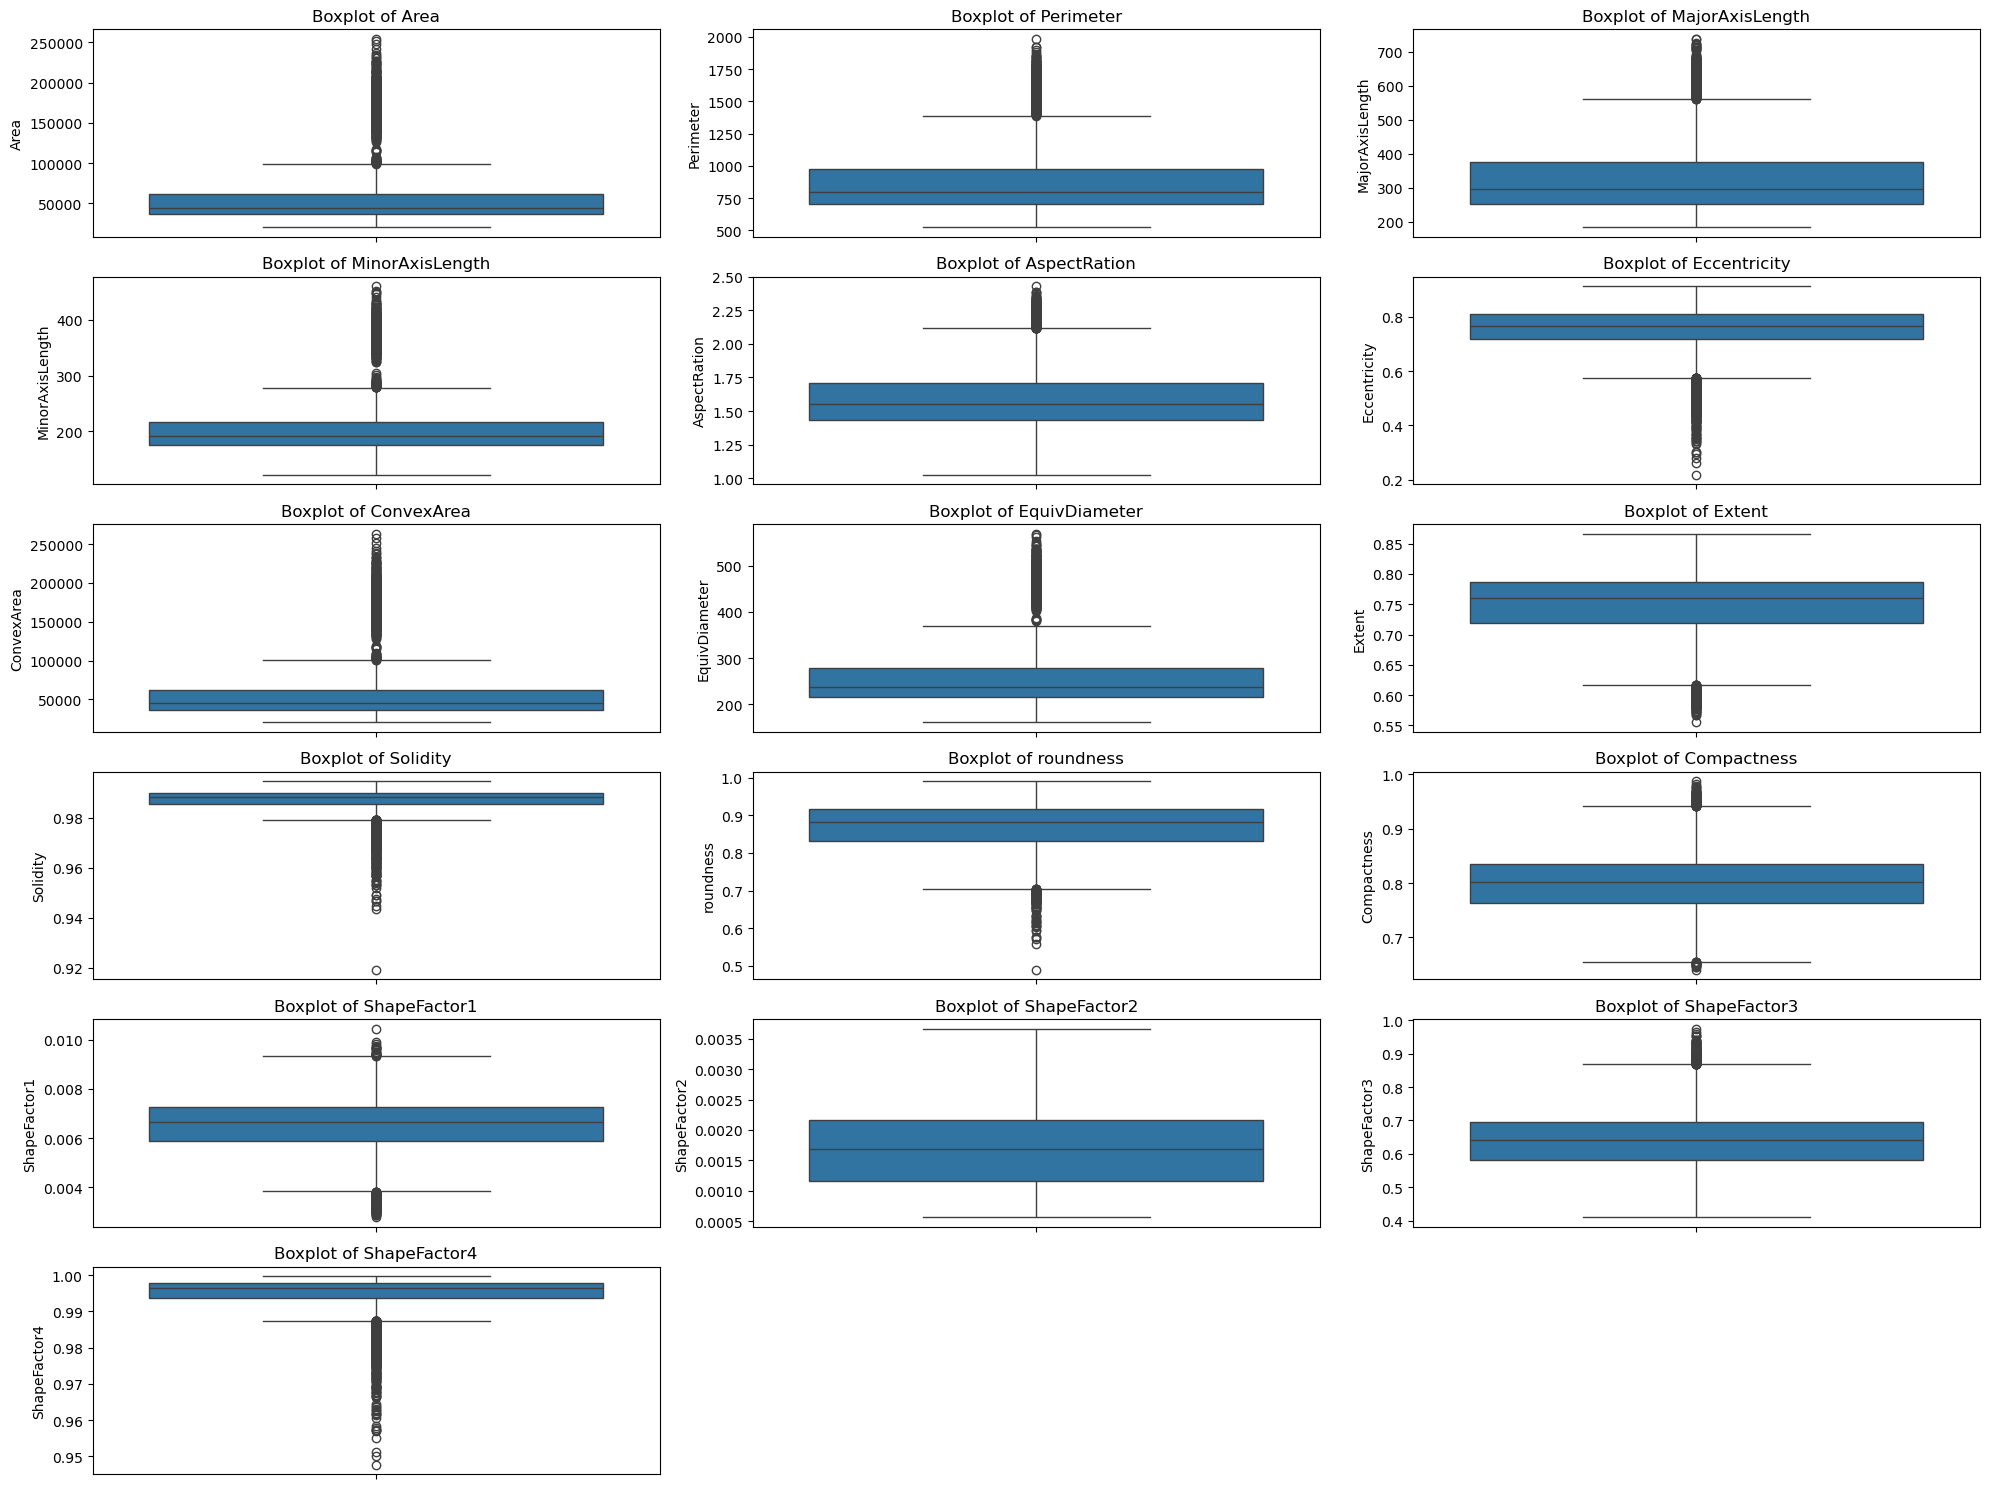

In [22]:
plt.figure(figsize=(20,15))
for i,column in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols)//3+1,3,i)
    sns.boxplot(data=df,y=column) 
    plt.title(f"Boxplot of {column}")  
    plt.tight_layout()

plt.show()

In [23]:
#Outlier Handling
def handle_outlier(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        df[col]=df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
    return df
df1=handle_outlier(df)

        

In [24]:
df1.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.57412,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.57412,29172.0,191.272750,0.783968,0.984986,0.887034,0.941972,0.006979,0.003564,0.867978,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.57412,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.57412,30724.0,195.467062,0.782681,0.979156,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.57412,30417.0,195.896503,0.773098,0.990893,0.984877,0.941972,0.006697,0.003665,0.867978,0.999166,SEKER


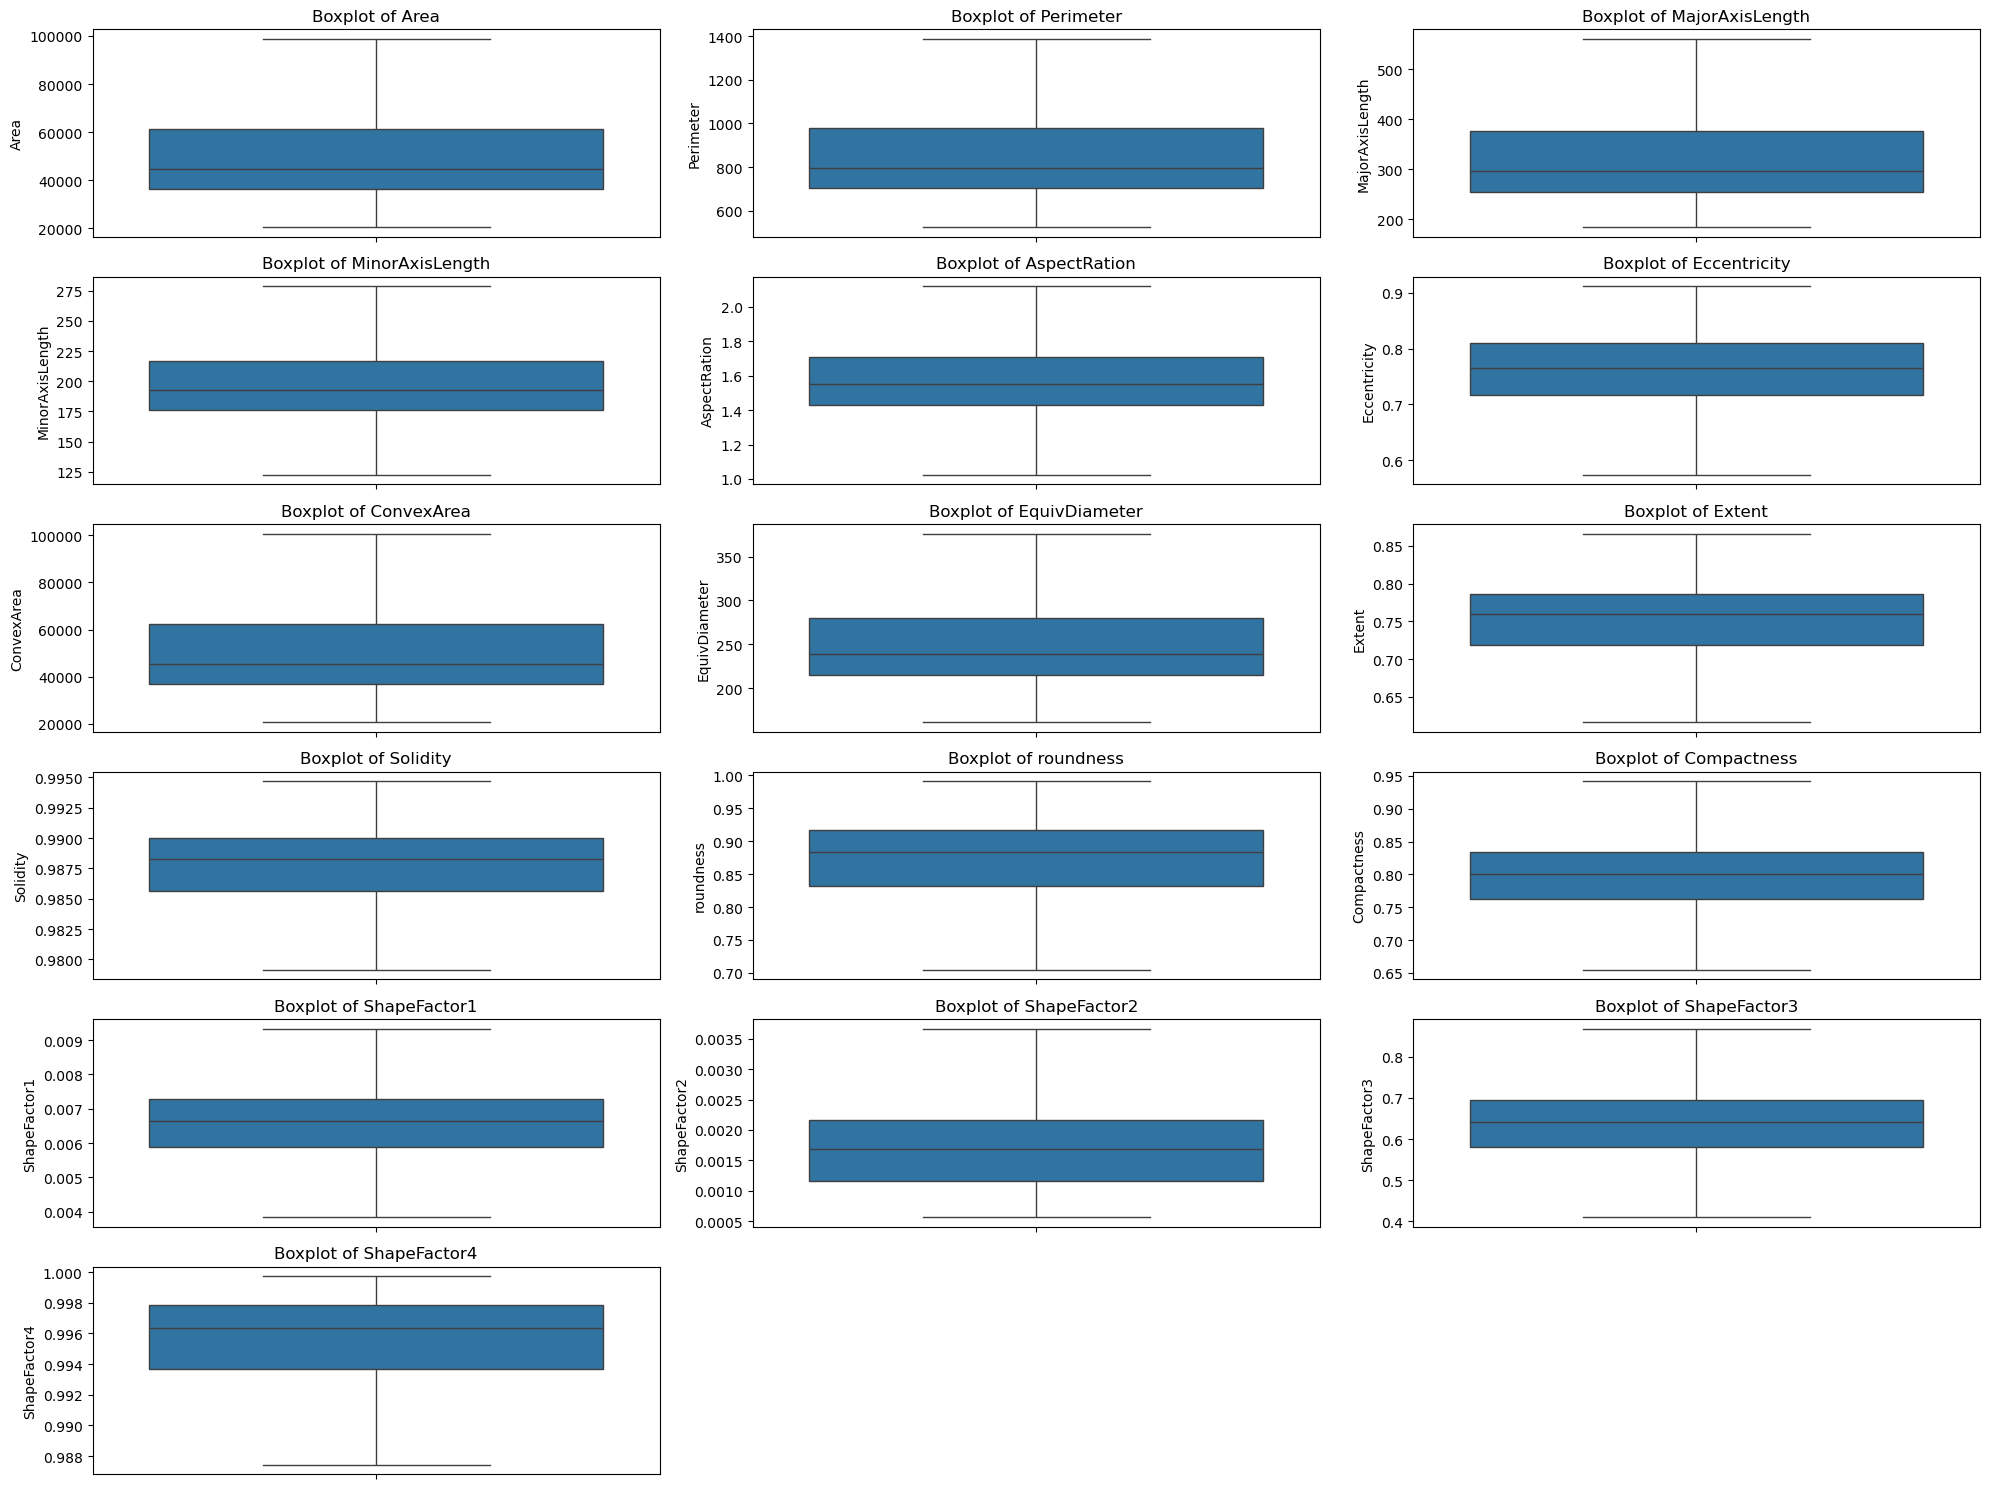

In [25]:
numeric_cols=df1.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(20,15))
for i,column in enumerate(numeric_cols,1):
    plt.subplot(len(numeric_cols)//3+1,3,i)
    sns.boxplot(data=df1,y=column) 
    plt.title(f"Boxplot of {column}")  
    plt.tight_layout()

plt.show()


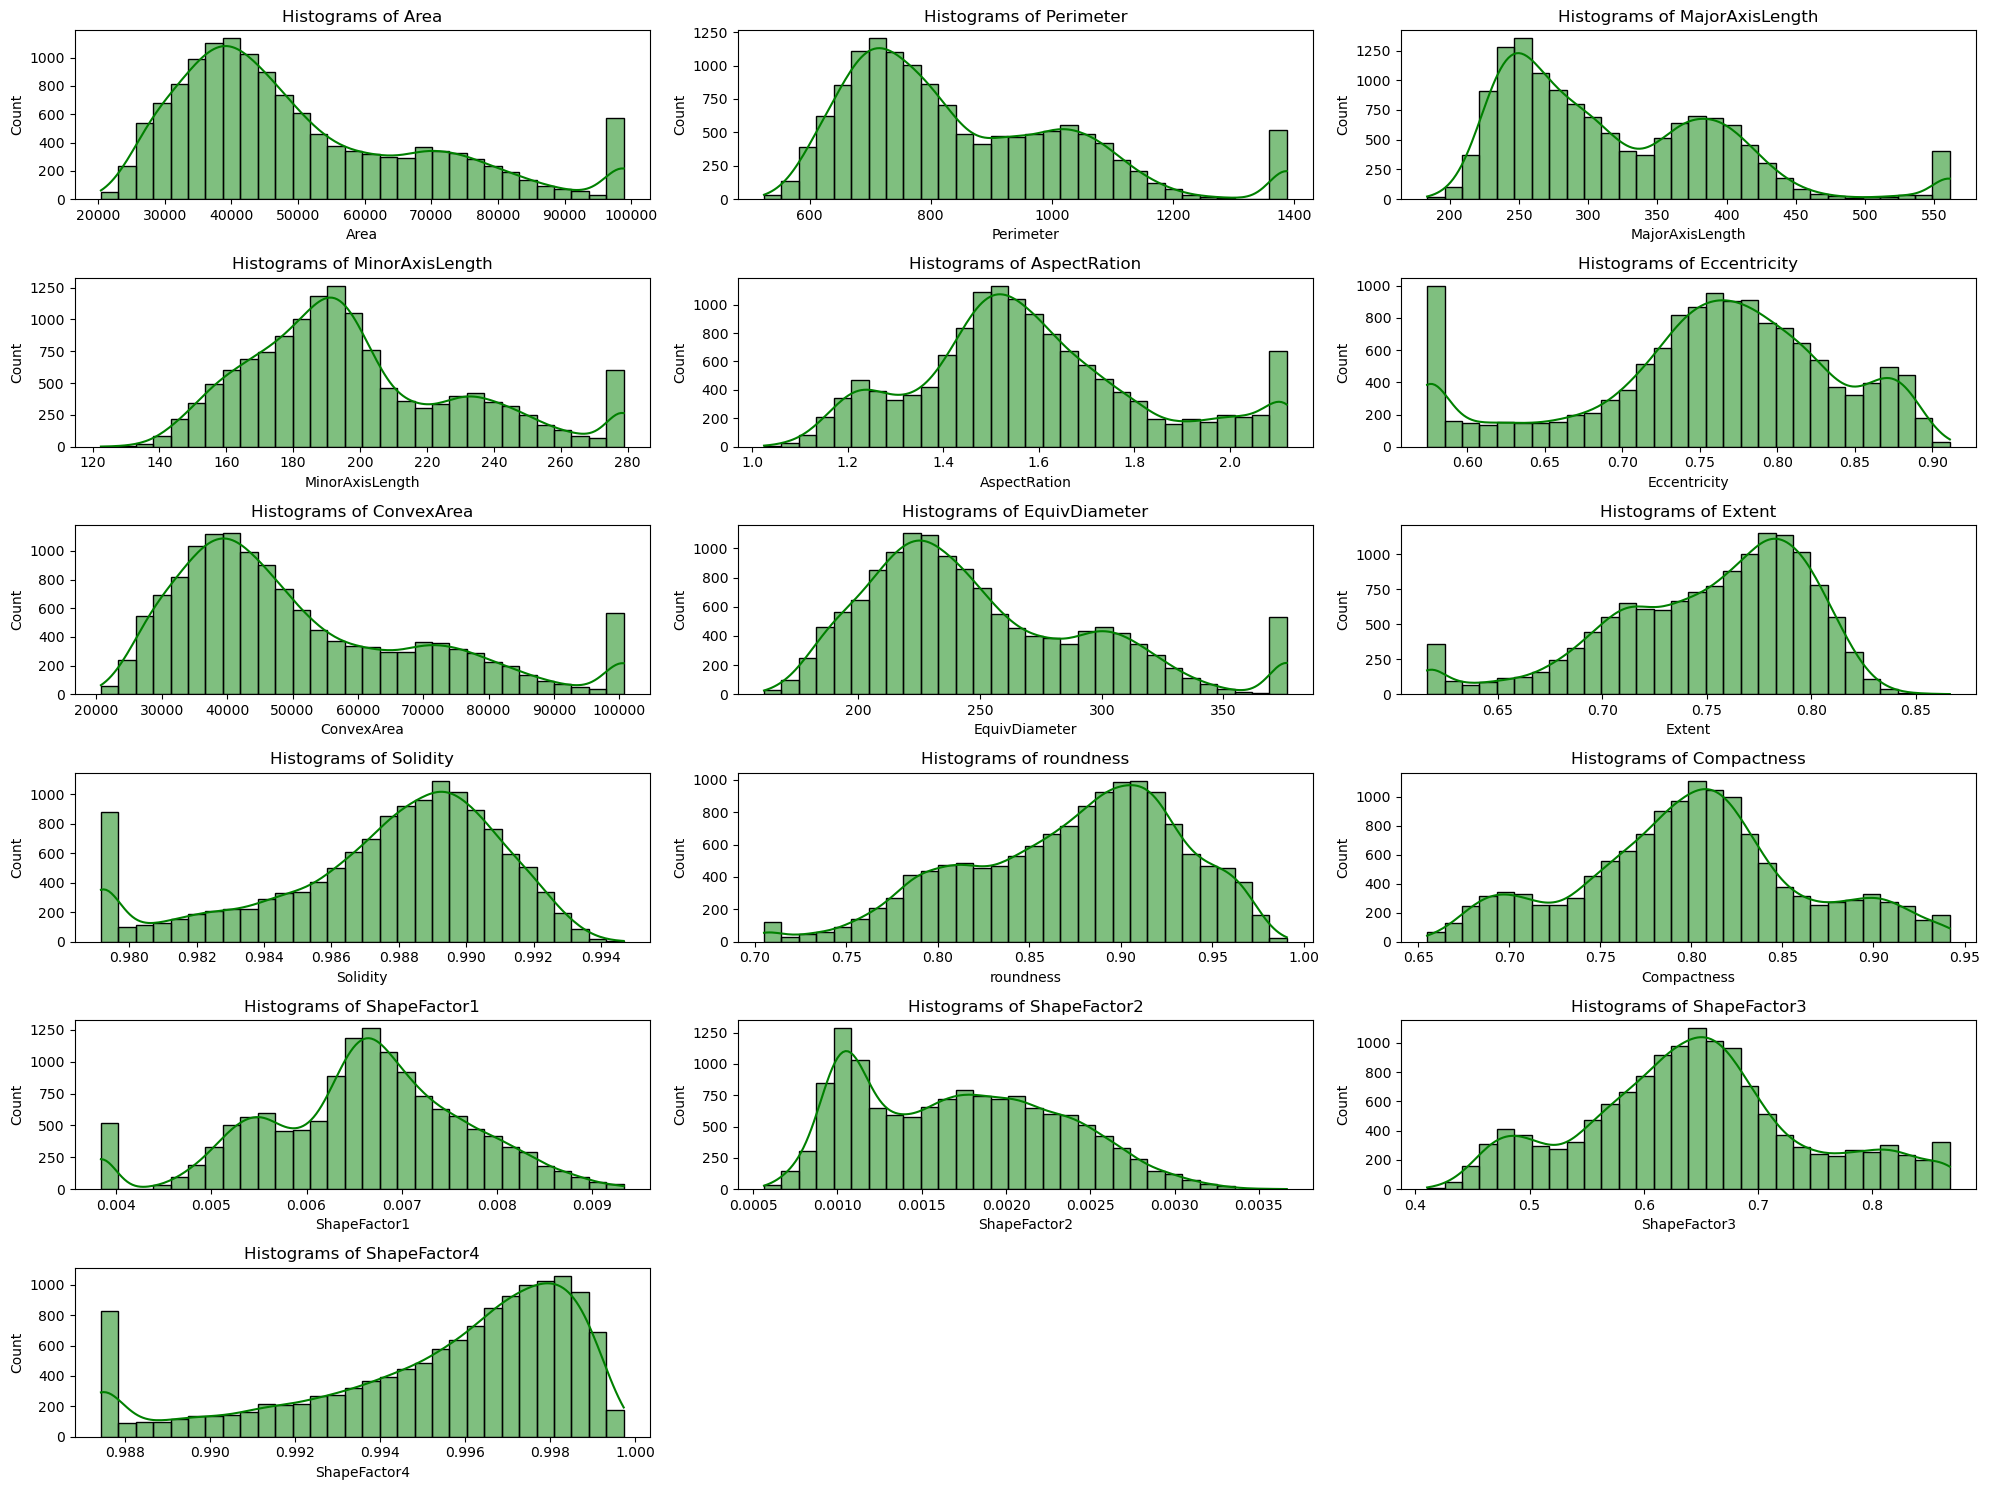

In [26]:
#Histogram
plt.figure(figsize=(20,15))
for i,column in enumerate(numeric_cols,1):
    plt.subplot(len(numeric_cols)//3+1,3,i)
    sns.histplot(data=df1,x=column,kde=True,color='green',bins=30) 
    plt.title(f"Histograms of {column}")  
    plt.tight_layout()

plt.show()

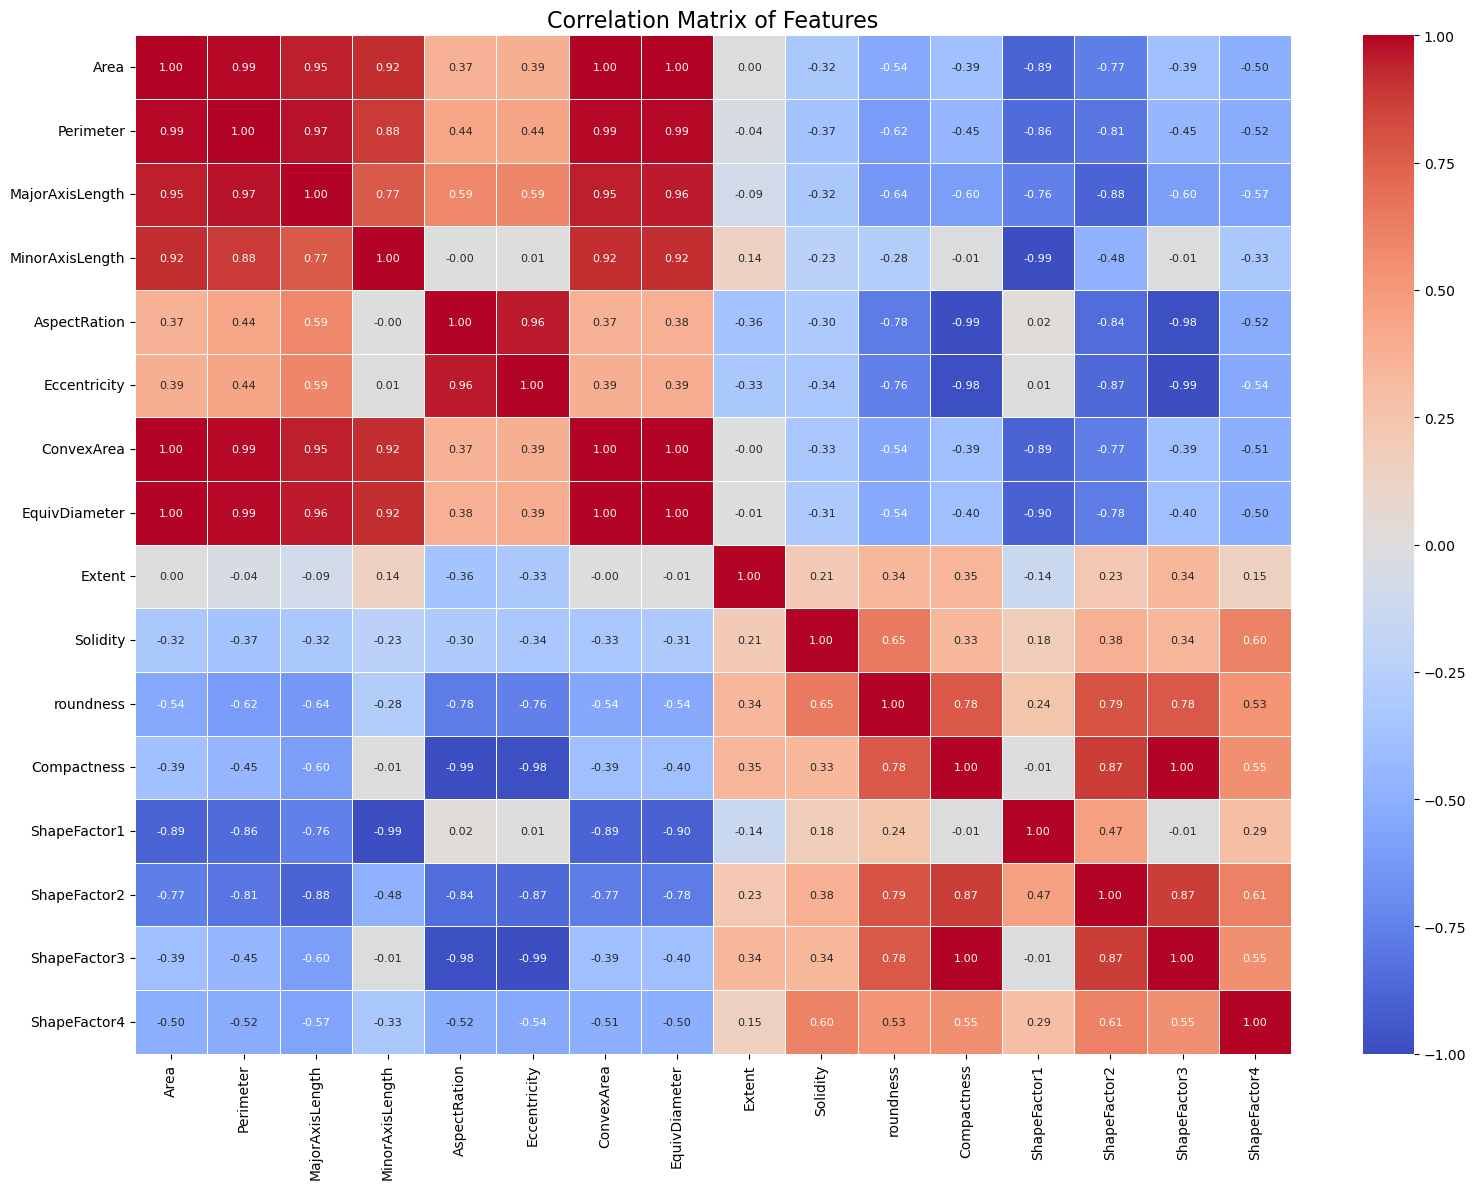

In [27]:
numeric_feature=df1.select_dtypes(include=['number'])
corr_matrix =numeric_feature.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
annot_kws={"size": 8},
vmin=-1, vmax=1)

plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=90) # Rotate x-axis labels
plt.yticks(rotation=0) # Rotate y-axis labels
plt.tight_layout() # Ensure everything fits in the figure
# Show the plot
plt.show()

In [ ]:
# Create a pair plot
sns.pairplot(df1,hue='Class',diag_kind='kde',markers='o',palette='viridis')
# Display the plot
plt.show()

In [29]:
#Skewness Handling
numeric_cols=df1.select_dtypes(include=['int64','float64']).columns
print(df1[numeric_cols].skew())

Area               0.956989
Perimeter          0.961668
MajorAxisLength    0.971004
MinorAxisLength    0.727810
AspectRation       0.472940
Eccentricity      -0.610125
ConvexArea         0.963532
EquivDiameter      0.832987
Extent            -0.783295
Solidity          -0.844704
roundness         -0.492208
Compactness        0.018794
ShapeFactor1      -0.329187
ShapeFactor2       0.301226
ShapeFactor3       0.193072
ShapeFactor4      -1.040172
dtype: float64


In [30]:
pt=PowerTransformer(method='yeo-johnson')

In [31]:
df1[numeric_cols]=pt.fit_transform(df1[numeric_cols])

In [32]:
print(df1[numeric_cols].skew())

Area               0.037440
Perimeter          0.063175
MajorAxisLength    0.073591
MinorAxisLength    0.023824
AspectRation       0.010347
Eccentricity      -0.059692
ConvexArea         0.039067
EquivDiameter      0.040525
Extent            -0.089436
Solidity          -0.098860
roundness         -0.061897
Compactness       -0.002376
ShapeFactor1      -0.000959
ShapeFactor2       0.058041
ShapeFactor3       0.001629
ShapeFactor4      -0.224800
dtype: float64


In [33]:
df1.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.539287,-1.664818,-1.967840,-0.730316,-1.808324,-1.858081,-1.540968,-1.546259,0.159085,0.264859,1.630106,1.836910,0.672589,2.091634,1.854821,1.303326,SEKER
1,-1.497117,-1.365992,-2.209170,-0.384563,-2.419200,-1.858081,-1.484840,-1.502725,0.681895,-0.850685,0.135061,2.294553,0.324856,2.542236,2.151128,1.125915,SEKER
2,-1.418699,-1.512361,-1.829600,-0.647454,-1.735658,-1.858081,-1.422734,-1.421903,0.521911,0.522474,1.391902,1.763451,0.585106,1.976020,1.780443,1.521698,SEKER
3,-1.344797,-1.286171,-1.896309,-0.392685,-2.067758,-1.858081,-1.303314,-1.345898,0.646196,-1.853003,0.457293,2.076556,0.361781,2.167985,2.097359,-0.649827,SEKER
4,-1.329545,-1.555487,-2.166165,-0.114616,-2.657916,-1.858081,-1.338158,-1.330231,0.389738,1.068954,2.300798,2.294553,0.056033,2.644335,2.151128,1.587894,SEKER
5,-1.313587,-1.397934,-1.837338,-0.430442,-1.962673,-1.858081,-1.317327,-1.313846,0.457456,0.503881,1.300651,2.002924,0.365024,2.097918,2.022858,1.634757,SEKER
6,-1.291036,-1.053524,-1.881714,-0.336331,-2.109654,-1.858081,-1.275753,-1.290705,0.122200,-1.050525,-0.455097,2.157208,0.272953,2.198740,2.151128,1.510284,SEKER
7,-1.286280,-1.452421,-1.824638,-0.384459,-1.995507,-1.858081,-1.289494,-1.285825,0.327621,0.450175,1.849976,2.030994,0.325333,2.104211,2.051262,1.075735,SEKER
8,-1.267571,-1.390112,-1.809061,-0.368861,-1.993935,-1.858081,-1.267524,-1.266641,0.350119,0.119918,1.540467,2.033844,0.305756,2.096512,2.054145,1.448083,SEKER
9,-1.250902,-1.429179,-1.704046,-0.453633,-1.787098,-1.858081,-1.259102,-1.249555,0.673953,1.032407,1.928353,1.817164,0.389366,1.929033,1.834829,1.518418,SEKER


In [34]:
le=LabelEncoder()
df1['Class']=le.fit_transform(df1['Class'])

In [35]:
df1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.539287,-1.664818,-1.967840,-0.730316,-1.808324,-1.858081,-1.540968,-1.546259,0.159085,0.264859,1.630106,1.836910,0.672589,2.091634,1.854821,1.303326,5
1,-1.497117,-1.365992,-2.209170,-0.384563,-2.419200,-1.858081,-1.484840,-1.502725,0.681895,-0.850685,0.135061,2.294553,0.324856,2.542236,2.151128,1.125915,5
2,-1.418699,-1.512361,-1.829600,-0.647454,-1.735658,-1.858081,-1.422734,-1.421903,0.521911,0.522474,1.391902,1.763451,0.585106,1.976020,1.780443,1.521698,5
3,-1.344797,-1.286171,-1.896309,-0.392685,-2.067758,-1.858081,-1.303314,-1.345898,0.646196,-1.853003,0.457293,2.076556,0.361781,2.167985,2.097359,-0.649827,5
4,-1.329545,-1.555487,-2.166165,-0.114616,-2.657916,-1.858081,-1.338158,-1.330231,0.389738,1.068954,2.300798,2.294553,0.056033,2.644335,2.151128,1.587894,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,-0.249490,-0.326363,-0.193254,-0.267073,-0.025783,0.011171,-0.256345,-0.238513,-0.863497,0.829160,0.712000,0.037814,0.209219,0.138166,0.035049,1.099448,3
13607,-0.249205,-0.342001,-0.310274,-0.099731,-0.364550,-0.352407,-0.257333,-0.238229,1.151289,1.007152,0.824413,0.368731,0.047668,0.364067,0.368768,1.003392,3
13608,-0.246494,-0.329026,-0.310887,-0.083516,-0.382243,-0.371794,-0.252046,-0.235535,-0.581239,0.654304,0.749579,0.376472,0.041186,0.368014,0.376583,0.272624,3
13609,-0.245924,-0.297554,-0.280145,-0.114738,-0.305847,-0.288361,-0.245158,-0.234969,-1.018573,-0.083244,0.535879,0.290984,0.081155,0.309001,0.290288,-0.329829,3


In [36]:
target_value=df1['Class'].value_counts()
target_value

Class
3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: count, dtype: int64

In [37]:
X=df1.drop('Class',axis=1)
y=df1['Class']

In [116]:
#Feature Selection
selector=SelectKBest(score_func=f_classif,k=15)
X_new=selector.fit_transform(X,y)

In [118]:
selected_features=X.columns[selector.get_support()]
feature_score=pd.DataFrame({"Features":X.columns,"score":selector.scores_}).sort_values(by='score',ascending=False)


In [120]:
print("Selected Features:",selected_features)
print("\nFeature Scores:")
print(feature_score)

Selected Features: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

Feature Scores:
           Features         score
2   MajorAxisLength  15103.681067
1         Perimeter  14992.916033
13     ShapeFactor2  14273.606212
6        ConvexArea  13262.905628
7     EquivDiameter  13122.700550
0              Area  13099.167308
14     ShapeFactor3  10295.906232
11      Compactness  10275.096396
4      AspectRation  10062.895461
5      Eccentricity   9812.551244
3   MinorAxisLength   9759.892858
12     ShapeFactor1   9524.721930
10        roundness   7379.779230
15     ShapeFactor4   2403.788529
9          Solidity   1002.690644
8            Extent    250.661437


In [122]:
X_selected=X[selected_features]

In [124]:
X_selected.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [126]:
#splitting data to trining and testing
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=42)


In [128]:
print(X_train.shape)

(10888, 15)


In [130]:
print(X_test.shape)

(2723, 15)


In [132]:
print(y_train.shape)

(10888,)


In [134]:
print(y_test.shape)

(2723,)


In [136]:
#Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [ ]:
#Model Building....

In [138]:
models={
    "Logistic Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()
}

In [140]:
results = {}

for model_name, model in models.items():
    #training
    model.fit(X_train,y_train)

    #predicting
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test,y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    cr = classification_report(y_test, y_pred)

    # Store results in Dictionary
    results[model_name] = {
         "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }
# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Logistic Regression Results:
Accuracy: 0.9254
Confusion Matrix:
[[241   0  13   0   0   1   6]
 [  0 117   0   0   0   0   0]
 [ 12   0 299   0   4   1   1]
 [  0   0   0 605   1   7  58]
 [  2   0   5   5 391   0   5]
 [  6   0   0   5   0 391  11]
 [  0   0   1  45   8   6 476]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       261
           1       1.00      1.00      1.00       117
           2       0.94      0.94      0.94       317
           3       0.92      0.90      0.91       671
           4       0.97      0.96      0.96       408
           5       0.96      0.95      0.95       413
           6       0.85      0.89      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723


Support Vector Classifier Results:
Accuracy: 0.9324
Confusion Matrix:
[[242   0  13   0   0   1 

In [148]:
# Define the SVC model
svc = SVC()

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  
}

# Perform GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Display best parameters and accuracy
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test_scaled)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))



Best Parameters from GridSearchCV: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy on Test Set: 0.9302240176276166
